In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

In [57]:
store_info = pd.read_csv('store_info_final.csv',index_col=0)
store_info

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,...,GINGER BEER 400ML 11 total_earning,GINGER BEER 400ML 12 total_earning,CHOCOLATE MILK 180ML 10 total_earning,CHOCOLATE MILK 180ML 11 total_earning,CHOCOLATE MILK 180ML 12 total_earning,LIME CRUSH JUICE 1L 10 total_earning,LIME CRUSH JUICE 1L 11 total_earning,LIME CRUSH JUICE 1L 12 total_earning,grand_quantity_Sold,grand_earning
0,SHOP047,528,Moderate,220,220,220,220,220,220,160,...,500,400,0,0,0,0,0,0,2848,446190
1,SHOP009,676,High,220,220,220,220,220,220,160,...,3500,1500,0,0,0,0,0,0,7091,1130155
2,SHOP083,676,Low,220,220,220,220,220,220,160,...,1300,900,0,0,630,0,0,0,5898,975960
3,SHOP117,676,Low,220,220,220,220,220,220,160,...,3200,1200,0,0,0,0,0,0,7376,1177470
4,SHOP042,676,Low,220,220,220,220,220,220,320,...,2200,1500,0,0,0,0,0,0,5134,829440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,High,220,220,220,220,220,220,320,...,2600,1200,0,0,0,0,0,0,8089,1247125
96,SHOP012,336,Low,220,220,220,220,220,220,320,...,3000,800,0,0,70,0,0,0,3827,595050
97,SHOP093,705,High,220,220,220,220,220,220,320,...,1900,1500,0,0,0,0,0,0,4721,662460
98,SHOP004,516,Low,220,220,220,220,220,220,160,...,2300,600,0,0,0,0,0,0,6002,970545


In [50]:
# header_item_price = ['ORANGE BARLEY 1.5L 10 item_price',
#  'ORANGE BARLEY 1.5L 11 item_price',
#  'ORANGE BARLEY 1.5L 12 item_price',
#  'GINGER BEER 1.5L 10 item_price',
#  'GINGER BEER 1.5L 11 item_price',
#  'GINGER BEER 1.5L 12 item_price',
#  'TONIC PET 500ML 10 item_price',
#  'TONIC PET 500ML 11 item_price',
#  'TONIC PET 500ML 12 item_price',
#  'CREAM SODA 1L 10 item_price',
#  'CREAM SODA 1L 11 item_price',
#  'CREAM SODA 1L 12 item_price',
#  'STRAWBERRY MILK 180ML 10 item_price',
#  'STRAWBERRY MILK 180ML 11 item_price',
#  'STRAWBERRY MILK 180ML 12 item_price',
#  'CREAM SODA 1.5L 10 item_price',
#  'CREAM SODA 1.5L 11 item_price',
#  'CREAM SODA 1.5L 12 item_price',
#  'TWISTEE APPLE 1L 10 item_price',
#  'TWISTEE APPLE 1L 11 item_price',
#  'TWISTEE APPLE 1L 12 item_price',
#  'FIT O MIXED FRUIT 200ML 10 item_price',
#  'FIT O MIXED FRUIT 200ML 11 item_price',
#  'FIT O MIXED FRUIT 200ML 12 item_price',
#  'SODA PET 1.5L 10 item_price',
#  'SODA PET 1.5L 11 item_price',
#  'SODA PET 1.5L 12 item_price',
#  'FIT O MIXED FRUIT 1L 10 item_price',
#  'FIT O MIXED FRUIT 1L 11 item_price',
#  'FIT O MIXED FRUIT 1L 12 item_price',
#  'KIK COLA 1L 10 item_price',
#  'KIK COLA 1L 11 item_price',
#  'KIK COLA 1L 12 item_price',
#  'LEMONADE 500ML 10 item_price',
#  'LEMONADE 500ML 11 item_price',
#  'LEMONADE 500ML 12 item_price',
#  'FIT O ORANGE 1L 10 item_price',
#  'FIT O ORANGE 1L 11 item_price',
#  'FIT O ORANGE 1L 12 item_price',
#  'NECTO 1.5L 10 item_price',
#  'NECTO 1.5L 11 item_price',
#  'NECTO 1.5L 12 item_price',
#  'LEMONADE 1.5L 10 item_price',
#  'LEMONADE 1.5L 11 item_price',
#  'LEMONADE 1.5L 12 item_price',
#  'GINGER BEER 1L 10 item_price',
#  'GINGER BEER 1L 11 item_price',
#  'GINGER BEER 1L 12 item_price',
#  'FIT O MANGO 200ML 10 item_price',
#  'FIT O MANGO 200ML 11 item_price',
#  'FIT O MANGO 200ML 12 item_price',
#  'FIT O MANGO 1L 10 item_price',
#  'FIT O MANGO 1L 11 item_price',
#  'FIT O MANGO 1L 12 item_price',
#  'CREAM SODA 500ML 10 item_price',
#  'CREAM SODA 500ML 11 item_price',
#  'CREAM SODA 500ML 12 item_price',
#  'FIT O ORANGE 200ML 10 item_price',
#  'FIT O ORANGE 200ML 11 item_price',
#  'FIT O ORANGE 200ML 12 item_price',
#  'CREAM SODA APPLE POP 1L 10 item_price',
#  'CREAM SODA APPLE POP 1L 11 item_price',
#  'CREAM SODA APPLE POP 1L 12 item_price',
#  'BOTTLED DRINKING WATER 500ML 10 item_price',
#  'BOTTLED DRINKING WATER 500ML 11 item_price',
#  'BOTTLED DRINKING WATER 500ML 12 item_price',
#  'SODA 500ML 10 item_price',
#  'SODA 500ML 11 item_price',
#  'SODA 500ML 12 item_price',
#  'GINGER BEER 500ML 10 item_price',
#  'GINGER BEER 500ML 11 item_price',
#  'GINGER BEER 500ML 12 item_price',
#  'SODA 1L 10 item_price',
#  'SODA 1L 11 item_price',
#  'SODA 1L 12 item_price',
#  'NECTO 500ML 10 item_price',
#  'NECTO 500ML 11 item_price',
#  'NECTO 500ML 12 item_price',
#  'ORANGE CRUSH 500ML 10 item_price',
#  'ORANGE CRUSH 500ML 11 item_price',
#  'ORANGE CRUSH 500ML 12 item_price',
#  'BOTTLED DRINKING WATER 1.5L 10 item_price',
#  'BOTTLED DRINKING WATER 1.5L 11 item_price',
#  'BOTTLED DRINKING WATER 1.5L 12 item_price',
#  'NECTO 1L 10 item_price',
#  'NECTO 1L 11 item_price',
#  'NECTO 1L 12 item_price',
#  'GINGER BEER SUGAR FREE 500ML 10 item_price',
#  'GINGER BEER SUGAR FREE 500ML 11 item_price',
#  'GINGER BEER SUGAR FREE 500ML 12 item_price',
#  'ORANGE CRUSH 1.5L 10 item_price',
#  'ORANGE CRUSH 1.5L 11 item_price',
#  'ORANGE CRUSH 1.5L 12 item_price',
#  'DRY GINGER ALE PET 500ML 10 item_price',
#  'DRY GINGER ALE PET 500ML 11 item_price',
#  'DRY GINGER ALE PET 500ML 12 item_price',
#  'LEMONADE 1L 10 item_price',
#  'LEMONADE 1L 11 item_price',
#  'LEMONADE 1L 12 item_price',
#  'ORANGE CRUSH 1L 10 item_price',
#  'ORANGE CRUSH 1L 11 item_price',
#  'ORANGE CRUSH 1L 12 item_price',
#  'GINGER BEER 400ML 10 item_price',
#  'GINGER BEER 400ML 11 item_price',
#  'GINGER BEER 400ML 12 item_price',
#  'CHOCOLATE MILK 180ML 10 item_price',
#  'CHOCOLATE MILK 180ML 11 item_price',
#  'CHOCOLATE MILK 180ML 12 item_price',
#  'LIME CRUSH JUICE 1L 10 item_price',
#  'LIME CRUSH JUICE 1L 11 item_price',
#  'LIME CRUSH JUICE 1L 12 item_price']

In [ ]:
# for i in header_item_price:
#     item_price = store_info[i]
#     print(item_price.max())
#     item_price.replace(to_replace = 0, value = item_price.max(), inplace=True)

In [52]:
# l = []
# for i in header_item_price:
#     if ((store_info[i]==0).all()):
#         l.append(i)
# l

['CHOCOLATE MILK 180ML 10 item_price',
 'CHOCOLATE MILK 180ML 11 item_price',
 'LIME CRUSH JUICE 1L 10 item_price']

In [53]:
# # Drop columns with all zeros in item_price
# store_info.drop(l, axis=1,inplace=True)
# store_info

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,...,GINGER BEER 400ML 11 total_earning,GINGER BEER 400ML 12 total_earning,CHOCOLATE MILK 180ML 10 total_earning,CHOCOLATE MILK 180ML 11 total_earning,CHOCOLATE MILK 180ML 12 total_earning,LIME CRUSH JUICE 1L 10 total_earning,LIME CRUSH JUICE 1L 11 total_earning,LIME CRUSH JUICE 1L 12 total_earning,grand_quantity_Sold,grand_earning
0,SHOP047,528,Moderate,220,220,220,220,220,220,160,...,500,400,0,0,0,0,0,0,2848,446190
1,SHOP009,676,High,220,220,220,220,220,220,160,...,3500,1500,0,0,0,0,0,0,7091,1130155
2,SHOP083,676,Low,220,220,220,220,220,220,160,...,1300,900,0,0,630,0,0,0,5898,975960
3,SHOP117,676,Low,220,220,220,220,220,220,160,...,3200,1200,0,0,0,0,0,0,7376,1177470
4,SHOP042,676,Low,220,220,220,220,220,220,320,...,2200,1500,0,0,0,0,0,0,5134,829440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,220,220,220,220,220,220,150,...,1400,0,0,0,0,0,0,0,3463,580335
120,SHOP050,411,NaN,220,220,220,220,220,220,160,...,1500,500,0,0,0,0,0,0,7103,1245725
121,SHOP061,699,NaN,220,220,220,220,220,220,320,...,1000,2100,0,0,0,0,0,0,5730,959610
122,SHOP056,597,NaN,220,220,220,220,220,220,160,...,3400,1200,0,0,0,0,0,0,9817,1560470


In [55]:
# store_info.to_csv('store_info_final.csv')

In [64]:
test_data = pd.read_csv('Testing-data.csv',index_col=0)
test_data

,shop_id,shop_area_sq_ft,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,TONIC PET 500ML 11 item_price,...,GINGER BEER 400ML 11 total_earning,GINGER BEER 400ML 12 total_earning,CHOCOLATE MILK 180ML 10 total_earning,CHOCOLATE MILK 180ML 11 total_earning,CHOCOLATE MILK 180ML 12 total_earning,LIME CRUSH JUICE 1L 10 total_earning,LIME CRUSH JUICE 1L 11 total_earning,LIME CRUSH JUICE 1L 12 total_earning,grand_quantity_Sold,grand_earning
0,SHOP046,545,220,220,220,220,220,220,160,160,...,3100,1500,0,0,0,0,0,0,6555,990880
1,SHOP024,676,220,220,220,220,220,220,160,160,...,4900,1200,0,0,0,0,0,0,4785,776460
2,SHOP023,617,220,220,220,220,220,220,160,160,...,300,500,0,0,280,0,0,0,7026,1174995
3,SHOP097,310,220,220,220,220,220,220,160,160,...,1500,1000,0,0,0,0,0,0,6049,932490
4,SHOP044,715,220,220,220,220,220,220,160,160,...,1100,700,0,0,0,0,0,0,4458,704395
5,SHOP030,530,220,220,220,220,220,220,160,160,...,3100,1200,0,0,0,0,0,0,7121,1130450
6,SHOP038,411,220,220,220,220,220,220,160,160,...,2600,800,0,0,0,0,0,0,5376,871840
7,SHOP029,597,220,220,220,220,220,220,160,160,...,500,4500,0,0,0,0,0,0,6487,1047780
8,SHOP096,676,220,220,220,220,220,220,320,160,...,3500,700,0,0,0,0,0,0,8083,1387230
9,SHOP092,617,220,220,220,220,220,220,150,160,...,2400,2800,0,0,0,0,0,0,6251,999630


In [ ]:
# for i in header_item_price:
#     item_price = test_data[i]
#     print(item_price.max())
#     # item_price.replace(to_replace = 0, value = item_price.max(), inplace=True)

In [65]:
from sklearn.preprocessing import LabelEncoder

label_store_info = store_info.copy()
label_encoder = LabelEncoder()

label_store_info['shop_profile'] = label_encoder.fit_transform(store_info['shop_profile'])

label_store_info

,shop_id,shop_area_sq_ft,shop_profile,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,...,GINGER BEER 400ML 11 total_earning,GINGER BEER 400ML 12 total_earning,CHOCOLATE MILK 180ML 10 total_earning,CHOCOLATE MILK 180ML 11 total_earning,CHOCOLATE MILK 180ML 12 total_earning,LIME CRUSH JUICE 1L 10 total_earning,LIME CRUSH JUICE 1L 11 total_earning,LIME CRUSH JUICE 1L 12 total_earning,grand_quantity_Sold,grand_earning
0,SHOP047,528,2,220,220,220,220,220,220,160,...,500,400,0,0,0,0,0,0,2848,446190
1,SHOP009,676,0,220,220,220,220,220,220,160,...,3500,1500,0,0,0,0,0,0,7091,1130155
2,SHOP083,676,1,220,220,220,220,220,220,160,...,1300,900,0,0,630,0,0,0,5898,975960
3,SHOP117,676,1,220,220,220,220,220,220,160,...,3200,1200,0,0,0,0,0,0,7376,1177470
4,SHOP042,676,1,220,220,220,220,220,220,320,...,2200,1500,0,0,0,0,0,0,5134,829440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHOP124,606,0,220,220,220,220,220,220,320,...,2600,1200,0,0,0,0,0,0,8089,1247125
96,SHOP012,336,1,220,220,220,220,220,220,320,...,3000,800,0,0,70,0,0,0,3827,595050
97,SHOP093,705,0,220,220,220,220,220,220,320,...,1900,1500,0,0,0,0,0,0,4721,662460
98,SHOP004,516,1,220,220,220,220,220,220,160,...,2300,600,0,0,0,0,0,0,6002,970545


In [66]:
from sklearn.model_selection import train_test_split

X = label_store_info.copy()
y = X.shop_profile
X.drop(['shop_profile'],axis=1,inplace=True)
X.drop(['shop_id'],axis=1,inplace=True)

X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8,random_state=0) # 80% as training set and 20 % as validation set

In [67]:
X_train

,shop_area_sq_ft,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,TONIC PET 500ML 11 item_price,TONIC PET 500ML 12 item_price,...,GINGER BEER 400ML 11 total_earning,GINGER BEER 400ML 12 total_earning,CHOCOLATE MILK 180ML 10 total_earning,CHOCOLATE MILK 180ML 11 total_earning,CHOCOLATE MILK 180ML 12 total_earning,LIME CRUSH JUICE 1L 10 total_earning,LIME CRUSH JUICE 1L 11 total_earning,LIME CRUSH JUICE 1L 12 total_earning,grand_quantity_Sold,grand_earning
43,706,220,220,220,220,220,220,160,160,160,...,2800,600,0,0,0,0,0,0,4723,822285
62,810,220,220,220,220,220,220,160,160,160,...,1800,1800,0,0,0,0,0,0,6405,1023880
3,676,220,220,220,220,220,220,160,160,160,...,3200,1200,0,0,0,0,0,0,7376,1177470
71,617,220,220,220,220,220,220,480,160,160,...,2200,1100,0,0,0,0,0,0,8119,1344195
45,617,220,220,220,220,220,220,160,160,160,...,1400,800,0,0,2100,0,0,0,5871,967385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,220,220,220,220,220,220,320,160,160,...,3000,800,0,0,70,0,0,0,3827,595050
67,520,220,220,220,220,220,220,160,160,160,...,1600,1000,0,0,1400,0,0,0,7118,1175765
64,617,220,220,220,220,220,220,160,160,160,...,3400,1800,0,0,0,0,0,0,7760,1191675
47,617,220,220,220,220,220,220,160,160,160,...,2700,900,0,0,420,0,0,0,5096,805110


In [68]:
test4 = test_data.copy()
test4.drop(['shop_id'],axis=1,inplace=True)
test4

,shop_area_sq_ft,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,TONIC PET 500ML 11 item_price,TONIC PET 500ML 12 item_price,...,GINGER BEER 400ML 11 total_earning,GINGER BEER 400ML 12 total_earning,CHOCOLATE MILK 180ML 10 total_earning,CHOCOLATE MILK 180ML 11 total_earning,CHOCOLATE MILK 180ML 12 total_earning,LIME CRUSH JUICE 1L 10 total_earning,LIME CRUSH JUICE 1L 11 total_earning,LIME CRUSH JUICE 1L 12 total_earning,grand_quantity_Sold,grand_earning
0,545,220,220,220,220,220,220,160,160,160,...,3100,1500,0,0,0,0,0,0,6555,990880
1,676,220,220,220,220,220,220,160,160,320,...,4900,1200,0,0,0,0,0,0,4785,776460
2,617,220,220,220,220,220,220,160,160,160,...,300,500,0,0,280,0,0,0,7026,1174995
3,310,220,220,220,220,220,220,160,160,160,...,1500,1000,0,0,0,0,0,0,6049,932490
4,715,220,220,220,220,220,220,160,160,160,...,1100,700,0,0,0,0,0,0,4458,704395
5,530,220,220,220,220,220,220,160,160,160,...,3100,1200,0,0,0,0,0,0,7121,1130450
6,411,220,220,220,220,220,220,160,160,160,...,2600,800,0,0,0,0,0,0,5376,871840
7,597,220,220,220,220,220,220,160,160,160,...,500,4500,0,0,0,0,0,0,6487,1047780
8,676,220,220,220,220,220,220,320,160,160,...,3500,700,0,0,0,0,0,0,8083,1387230
9,617,220,220,220,220,220,220,150,160,160,...,2400,2800,0,0,0,0,0,0,6251,999630


c:\Python37\cv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.02419
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00340
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00776
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00889
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00118

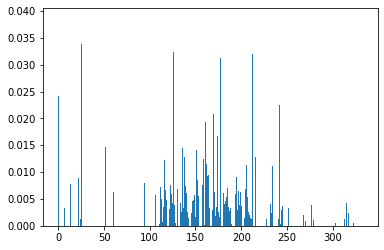

Confusion Matrix: 
[[6 0 2]
 [0 4 1]
 [0 7 0]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.36      0.80      0.50         5
           2       0.00      0.00      0.00         7

    accuracy                           0.50        20
   macro avg       0.45      0.52      0.45        20
weighted avg       0.49      0.50      0.47        20

F1 Score:  0.4523809523809524


In [70]:
# Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# # instantiate
# model = DecisionTreeClassifier()
# # fit
# model.fit(X_train, y_train)


# xgboost classifier

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500, learning_rate=0.05)
model.fit(X_train,y_train)

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=1500, random_state=0)
# model.fit(X_train,y_train)

# predictions = model.predict(X_val)

# Catboost classifier
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(iterations=850,learning_rate=0.01)
# model.fit(X_train,y_train)


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,auc,precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


# plot the Receiver Operating Characteristic (ROC) and calculate the Area Under the ROC curve(AUC_score)

preds_prob = model.predict_proba(X_val)
predictions = model.predict(X_val)

print("Confusion Matrix: ")
print(confusion_matrix(y_val,predictions)) # confusion matrix

print(classification_report(y_val,predictions)) # classification report

f1_score = f1_score(y_val,predictions,average='macro') #F1 score
print("F1 Score: ",f1_score)



In [71]:
preds_test = model.predict(test4)
print(preds_test)

convertion = {0:'High',1:'Low',2:'Moderate'}
new_preds_test = []
for i in preds_test:
    new_preds_test.append(convertion[i])
print(new_preds_test)


[0 1 1 2 2 1 1 1 2 1 2 1 1 0 2 1 1 1 0 2 1 1 0 1]
['High', 'Low', 'Low', 'Moderate', 'Moderate', 'Low', 'Low', 'Low', 'Moderate', 'Low', 'Moderate', 'Low', 'Low', 'High', 'Moderate', 'Low', 'Low', 'Low', 'High', 'Moderate', 'Low', 'Low', 'High', 'Low']


In [77]:
importance
important_features = np.nonzero(importance)[0]
print(important_features,len(important_features))

X_train_2 = X_train.iloc[:,important_features]
X_val_2 = X_val.iloc[:,important_features]
test4_2 = test4.iloc[:,important_features]
X_train_2

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140] 141


,shop_area_sq_ft,ORANGE BARLEY 1.5L 10 item_price,ORANGE BARLEY 1.5L 11 item_price,ORANGE BARLEY 1.5L 12 item_price,GINGER BEER 1.5L 10 item_price,GINGER BEER 1.5L 11 item_price,GINGER BEER 1.5L 12 item_price,TONIC PET 500ML 10 item_price,TONIC PET 500ML 11 item_price,TONIC PET 500ML 12 item_price,...,FIT O MIXED FRUIT 200ML 11 quantity_sold,FIT O MIXED FRUIT 200ML 12 quantity_sold,SODA PET 1.5L 10 quantity_sold,SODA PET 1.5L 11 quantity_sold,SODA PET 1.5L 12 quantity_sold,FIT O MIXED FRUIT 1L 10 quantity_sold,FIT O MIXED FRUIT 1L 11 quantity_sold,FIT O MIXED FRUIT 1L 12 quantity_sold,KIK COLA 1L 10 quantity_sold,KIK COLA 1L 11 quantity_sold
43,706,220,220,220,220,220,220,160,160,160,...,69,26,24,73,21,10,82,11,8,12
62,810,220,220,220,220,220,220,160,160,160,...,39,26,61,123,89,19,77,17,9,25
3,676,220,220,220,220,220,220,160,160,160,...,106,36,163,183,167,10,80,20,28,22
71,617,220,220,220,220,220,220,480,160,160,...,84,32,64,84,40,21,109,29,14,16
45,617,220,220,220,220,220,220,160,160,160,...,43,6,83,128,88,21,63,10,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,220,220,220,220,220,220,320,160,160,...,29,15,29,34,23,3,47,11,9,12
67,520,220,220,220,220,220,220,160,160,160,...,74,32,28,92,63,6,78,15,8,4
64,617,220,220,220,220,220,220,160,160,160,...,107,104,54,98,70,12,85,17,12,26
47,617,220,220,220,220,220,220,160,160,160,...,59,9,51,63,42,3,47,5,6,7


c:\Python37\cv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.01829
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04593
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02168
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.02342
Feature: 14, Score: 0.00232
Feature: 15, Score: 0.00425
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00700
Feature: 22, Score: 0.08565
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.02949

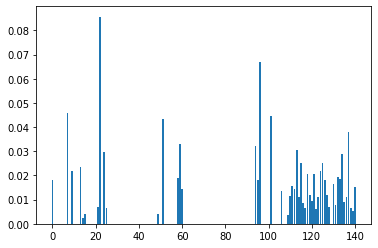

Confusion Matrix: 
[[3 2 3]
 [0 5 0]
 [1 2 4]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.56      1.00      0.71         5
           2       0.57      0.57      0.57         7

    accuracy                           0.60        20
   macro avg       0.63      0.65      0.60        20
weighted avg       0.64      0.60      0.58        20

F1 Score:  0.5952380952380952


In [78]:
# Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# # instantiate
# model = DecisionTreeClassifier()
# # fit
# model.fit(X_train, y_train)


# xgboost classifier

from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500, learning_rate=0.05)
model.fit(X_train_2,y_train)

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=1500, random_state=0)
# model.fit(X_train,y_train)

# predictions = model.predict(X_val)

# Catboost classifier
# from catboost import CatBoostClassifier
# model = CatBoostClassifier(iterations=850,learning_rate=0.01)
# model.fit(X_train,y_train)


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score,auc,precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score


# plot the Receiver Operating Characteristic (ROC) and calculate the Area Under the ROC curve(AUC_score)

preds_prob = model.predict_proba(X_val_2)
predictions = model.predict(X_val_2)

print("Confusion Matrix: ")
print(confusion_matrix(y_val,predictions)) # confusion matrix

print(classification_report(y_val,predictions)) # classification report

f1_score = f1_score(y_val,predictions,average='macro') #F1 score
print("F1 Score: ",f1_score)



In [79]:
preds_test = model.predict(test4_2)
print(preds_test)

convertion = {0:'High',1:'Low',2:'Moderate'}
new_preds_test = []
for i in preds_test:
    new_preds_test.append(convertion[i])
print(new_preds_test)


[1 1 0 2 2 1 1 1 1 1 0 2 1 0 2 1 1 1 1 1 2 1 1 1]
['Low', 'Low', 'High', 'Moderate', 'Moderate', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Moderate', 'Low', 'High', 'Moderate', 'Low', 'Low', 'Low', 'Low', 'Low', 'Moderate', 'Low', 'Low', 'Low']


In [81]:
output = pd.DataFrame({'shop_id':test_data.shop_id,'shop_profile': new_preds_test})
output.to_csv('Datastorm9.csv',index=False)